In [ ]:
!wget https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip


--2023-03-29 10:48:43--  https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip
Resolving drive.google.com (drive.google.com)... 172.253.117.100, 172.253.117.102, 172.253.117.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip&followup=https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip [following]
--2023-03-29 10:48:43--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip&followup=https://drive.google.com/drive/u/1/my-drive/SRAF_dataset.zip
Resolving accounts.google.com (accounts.google.com)... 74.125.195.84, 2607:f8b0:400e:c07::54
Connecting to accounts.google.com (accounts.google.com)|74.125.195.84|:443... connected.
HTTP request

In [ ]:
! pip install p7zip-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement p7zip-full (from versions: none)
ERROR: No matching distribution found for p7zip-full


In [ ]:
! 7z x  /content/SRAF_datas


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 153291 bytes (150 KiB)

Extracting archive: /content/SRAF_dataset.zip
ERROR: /content/SRAF_dataset.zip
/content/SRAF_dataset.zip
Open ERROR: Can not open the file as [zip] archive


ERRORS:
Is not archive
  0%    
Can't open as archive: 1
Files: 0
Size:       0
Compressed: 0


In [ ]:
# or to download from my Google Disk
! unzip /content/drive/MyDrive/SRAF_dataset.zip


Archive:  /content/drive/MyDrive/SRAF_dataset.zip
   creating: SRAF_dataset/train/
   creating: SRAF_dataset/train/no_sraf_on_image/
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0061-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0062-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0063-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0064-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0065-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0066-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0067-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0068-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0069-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0070-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0071-01MS.tif  
  inflating: SRAF_dataset/train/no_sraf_on_image/S04_M0072-01MS.tif  
  inflating: SRAF_dataset/t

In [ ]:
! unzip /content/SRAF_TEST.zip

Archive:  /content/SRAF_TEST.zip
   creating: SRAF_TEST/test_images/
  inflating: SRAF_TEST/test_images/S04_M0001-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0002-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0003-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0004-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0005-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0006-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0007-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0008-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0009-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0010-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0011-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0012-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0013-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0014-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0015-01MS.tif  
  inflating: SRAF_TEST/test_images/S04_M0016-01MS.tif  
  inflating: SRAF_TEST/test_images/

Импортируем нужные библиотеки:

In [ ]:
import os
from tqdm.autonotebook import tqdm, trange

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

import numpy as np
import random
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import time
from PIL import Image
from sklearn import preprocessing
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
#import scikitplot
import seaborn as sns






random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


<ipython-input-2-5217aae92a6e>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Поработаем с обучающей и валидационной выборкой:

In [ ]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485), (0.229))
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize((0.485), (0.229))
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
#прописываем директории
data_dir = './SRAF_dataset'
VAL_DIR = Path('./SRAF_dataset/val')


#извлекаем названия файлов из тестового и валидационного датасетов
val_files = sorted(list(VAL_DIR.rglob('*.tif') ))


#создаём датасеты и превращаем их в тензоры. тестовый датасет создадим отдельно
# но применим к нему то же преобразование, что и для валидационного
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}



# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=2)
               for x in ['train', 'val']}



dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()


In [ ]:
len(test_dataset)

31

In [ ]:
class_names

['no_sraf_on_image', 'sraf_on_image']

In [ ]:
print(dataset_sizes)
#dataset_sizes['train']


{'train': 200, 'val': 191}


In [ ]:
image_datasets['train'][90]

Label: 1


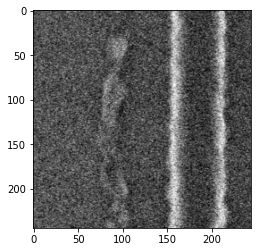

In [ ]:
img_1, label_1 = image_datasets['train'][155]
plt.imshow(img_1[2,:,:], cmap='gray')
print('Label:', label_1)
# Label '0' for NO_SRAF image,
# LAbel '1' for SRAF image

In [ ]:
#generate a list of 10 random numbers
random_numb = random.sample(range(0, dataset_sizes['train']), 10)
print(random_numb)

[98, 194, 107, 10, 66, 130, 124, 103, 77, 122]


In [ ]:
#@title
for i,j in enumerate(random_numb):
  print(i,j)


0 92
1 54
2 35
3 70
4 190
5 74
6 50
7 159
8 154
9 93


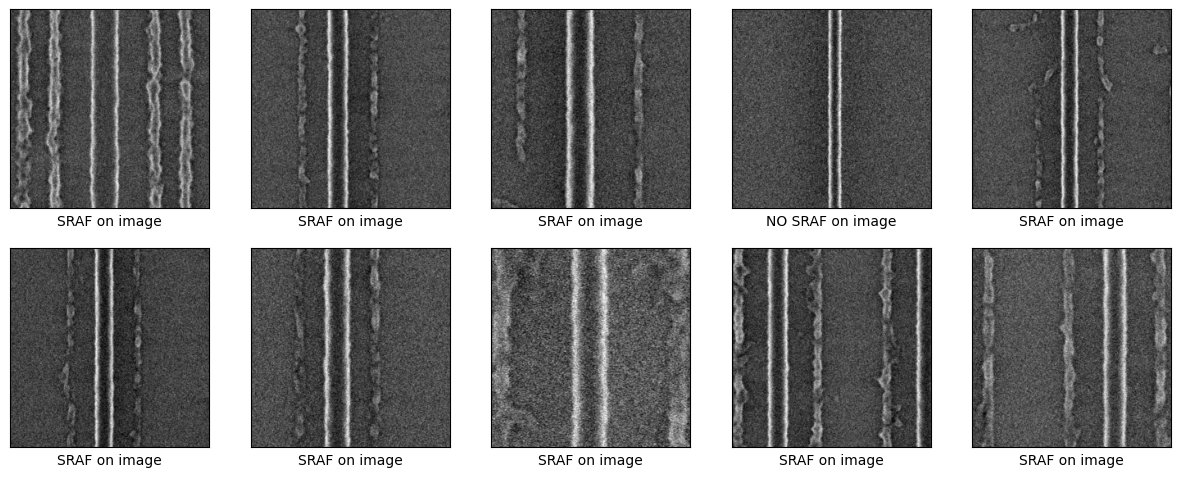

In [ ]:
# Show 10 random images from train dataset
#inputs, classes = next(iter(dataloaders['val']))
plt.figure(figsize=(15,15))
for i,j in enumerate(random_numb):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img, label = image_datasets['train'][j]
    plt.imshow(img[2,:,:], cmap='gray')

    if label == 0:
      plt.xlabel("NO SRAF on image")
    elif label == 1:
      plt.xlabel("SRAF on image")
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    #Ваш код здесь
    losses = {'train': [], "val": []}
    accur= {'train': [], 'val': []}

    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()

                # forward pass
                if phase == "eval":
                    with torch.no_grad():
                        outputs = model(inputs)
                else:
                    outputs = model(inputs)
                preds = torch.argmax(outputs, -1)
                loss = criterion(outputs, labels)

                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            # Ваш код здесь
            losses[phase].append(epoch_loss)
            accur[phase].append(epoch_acc)
            
            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc
                                ))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses, accur

In [ ]:
#@title
def visualizze_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images // 2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            plt.imshow(inputs.cpu().data[j][2,:,:])

            if images_so_far == num_images:
                return

In [ ]:
def predict(model, test_loader):
    model.eval()
    logits=[]
    tr_lab = []
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на gpu, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forward pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        logits.append(list(predicted.numpy()))
        tr_lab.append(list(labels.numpy()))
    return logits, tr_lab    


In [ ]:
def evaluate(model):
    model.eval()
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на gpu, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forard pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

In [ ]:
model = models.alexnet(pretrained=True)


NameError: ignored

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 50)



# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

NameError: ignored

In [ ]:
model, losses, accuracies = train_model(model, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=30)

Epoch::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

train iter::   0%|          | 0/50 [00:00<?, ?it/s]

val iter::   0%|          | 0/48 [00:00<?, ?it/s]

Training complete in 9m 14s
Best val Acc: 0.942408


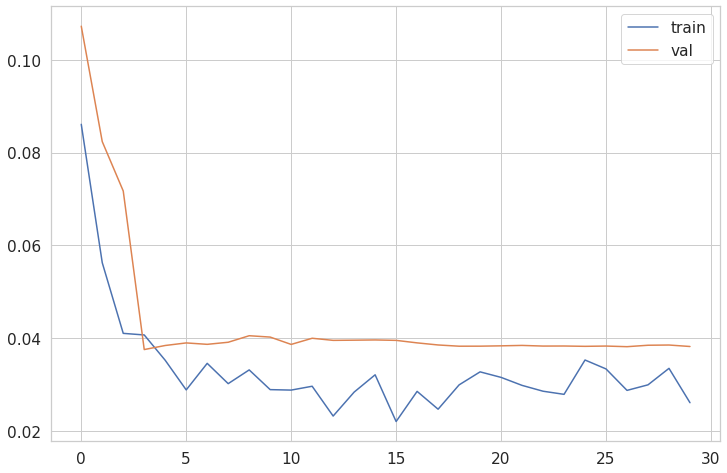

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], label="train")
plt.plot(losses['val'], label="val")
plt.legend()
plt.show()

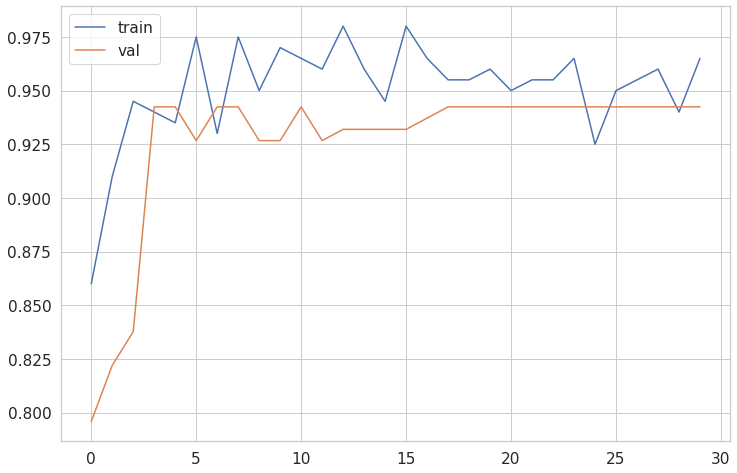

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график accuracy при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracies['train'], label="train")
plt.plot(accuracies['val'], label="val")
plt.legend()
plt.show()

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.9424


In [ ]:
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/AlexNet_SRAF_tuned.pth')

In [ ]:
new_model = torch.load('/content/drive/MyDrive/Colab Notebooks/AlexNet_SRAF_tuned.pth')

In [ ]:
new_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=50, bias=True)
)

Now let's look how the model works in a prediction mode. 

We iterate through batches in validation dataloader(batch_size =4). We get inputs, labels and outputs of th =e model. After for loop we print the result of last iteration, i.e. 3 final images. we have tensor 
of size ([ [3, 3, 244, 244] ]), zero dimension for batch size = 3 images in a batch. 

Therefore we have 3 labels. Ouptuts size = batch_size x number_of_classess = 3 X 2 = 6

After that we take the prediction of a model by taking the max element in each row of an output. This way we get a prediction. 

In [ ]:
for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)
        outputs = new_model(inputs)
        


KeyboardInterrupt: ignored

In [ ]:
print(inputs.size())
print(labels)
print(outputs)
_, preds = torch.max(outputs.data, 1)
probs = torch.softmax(outputs.data, dim = 1)
print(preds)
print(probs)
print(class_names[preds[2]])
print(inputs.data[0].size())
print(inputs.data[0][2,:,:].size())


torch.Size([3, 3, 244, 244])
tensor([1, 0, 0])
tensor([[-54.7970,  63.0418],
        [  3.4067,  -3.2529],
        [  1.4490,   0.2799]], grad_fn=<AddmmBackward0>)
tensor([1, 0, 0])
tensor([[0.0000, 1.0000],
        [0.9987, 0.0013],
        [0.7630, 0.2370]])
no_sraf_on_image
torch.Size([3, 244, 244])
torch.Size([244, 244])


In [ ]:
list(preds.numpy())



[1, 0, 1]

In [ ]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure(figsize=(14,10))

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        pred_probs = torch.softmax(outputs.data, dim=1)

        for j in range(inputs.size()[0]):
          images_so_far += 1
          plt.subplot(2,3,images_so_far)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          
          plt.imshow(inputs.data[j][2,:,:], cmap='gray') ## or we can write: plt.imshow(inputs.data[j].permute(1,2,0), cmap='gray')
          plt.xlabel(f"Predicted label:{class_names[preds[j]]}\n Probability:{pred_probs[j].max():.2f} ", fontsize=12)

          if images_so_far == num_images:
            return

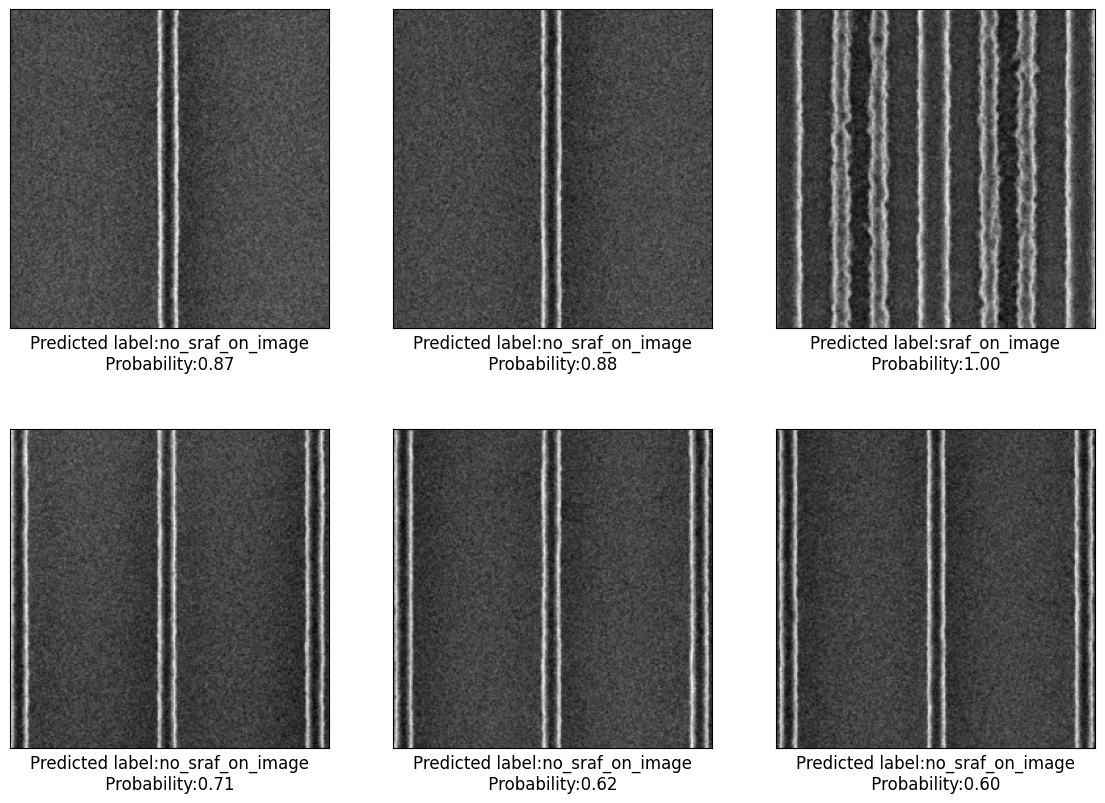

In [ ]:
visualize_model(new_model)


Теперь запишем истинные лейблы из тестового датасета в переменную true_labels с 
исползованием LabelEncoder. Повторим аналогичную операцию для предсказаний. На основе этого отобразим качество модели с помощью confusion matrix и classification report:

In [ ]:
y_hat, tr_lab = predict(new_model, dataloaders['val'])
true_labels= [item for sublist in tr_lab for item in sublist]
mylist_n = [j for i in y_hat for j in i]

le = preprocessing.LabelEncoder()
le.fit(['NO SRAF on image', 'SRAF on image'])
true_labels = list(le.inverse_transform(true_labels))
final_pred = list(le.inverse_transform(mylist_n))

In [ ]:
print(classification_report(true_labels, final_pred))

                  precision    recall  f1-score   support

NO SRAF on image       1.00      0.88      0.94        91
   SRAF on image       0.90      1.00      0.95       100

        accuracy                           0.94       191
       macro avg       0.95      0.94      0.94       191
    weighted avg       0.95      0.94      0.94       191



In [ ]:
#записываем предсказанные лейблы
confusion_matrix(true_labels, final_pred, labels=['NO SRAF on image', 'SRAF on image'] )


array([[ 80,  11],
       [  0, 100]])

<Axes: >

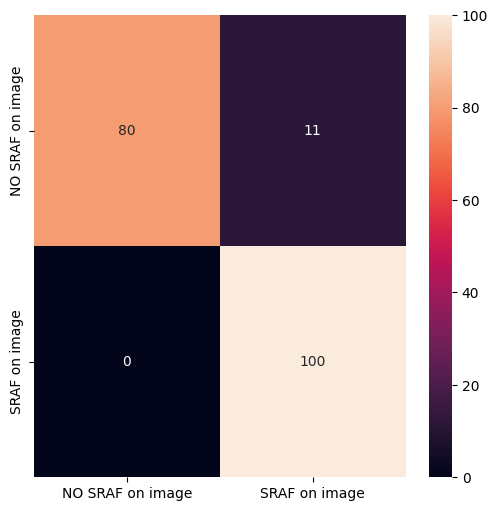

In [ ]:
import pandas as pd

confusion_matr = confusion_matrix(true_labels, final_pred, labels=['NO SRAF on image', 'SRAF on image'] )
conf_matr = pd.DataFrame(confusion_matr, index = ['NO SRAF on image', 'SRAF on image'], columns=['NO SRAF on image', 'SRAF on image'])
plt.figure(figsize=(6,6))

sns.heatmap(conf_matr, annot=True, fmt='g', cmap="rocket")

In [ ]:
evaluate(new_model)


0.9895287958115183

In [ ]:
#@title
y = predict(new_model, dataloaders['val'])
#print(y)

In [ ]:
#@title
mylist_n = [j for i in y for j in i]
print(len(mylist_n))


191


In [ ]:
#@title
le = preprocessing.LabelEncoder()
le.fit(['NO SRAF on image', 'SRAF on image'])

LabelEncoder()

In [ ]:
#@title
list(le.classes_)

['NO SRAF on image', 'SRAF on image']

In [ ]:
#@title
le.transform(['NO SRAF on image','NO SRAF on image','NO SRAF on image', 'SRAF on image'])


array([0, 0, 0, 1])

In [ ]:
#@title
final_pred = list(le.inverse_transform(mylist_n))
final_pred

['SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'SRAF on image',
 'NO SRAF on image',
 'NO SRAF 

In [ ]:
val_filenames = [path.name for path in val_files]
val_filenames

['S04_M0396-01MS.tif',
 'S04_M0397-01MS.tif',
 'S04_M0398-01MS.tif',
 'S04_M0399-01MS.tif',
 'S04_M0400-01MS.tif',
 'S04_M0401-01MS.tif',
 'S04_M0402-01MS.tif',
 'S04_M0403-01MS.tif',
 'S04_M0404-01MS.tif',
 'S04_M0405-01MS.tif',
 'S04_M0406-01MS.tif',
 'S04_M0407-01MS.tif',
 'S04_M0408-01MS.tif',
 'S04_M0409-01MS.tif',
 'S04_M0410-01MS.tif',
 'S04_M0411-01MS.tif',
 'S04_M0412-01MS.tif',
 'S04_M0413-01MS.tif',
 'S04_M0414-01MS.tif',
 'S04_M0415-01MS.tif',
 'S04_M0416-01MS.tif',
 'S04_M0417-01MS.tif',
 'S04_M0418-01MS.tif',
 'S04_M0419-01MS.tif',
 'S04_M0420-01MS.tif',
 'S04_M0421-01MS.tif',
 'S04_M0422-01MS.tif',
 'S04_M0423-01MS.tif',
 'S04_M0424-01MS.tif',
 'S04_M0425-01MS.tif',
 'S04_M0426-01MS.tif',
 'S04_M0427-01MS.tif',
 'S04_M0428-01MS.tif',
 'S04_M0429-01MS.tif',
 'S04_M0430-01MS.tif',
 'S04_M0431-01MS.tif',
 'S04_M0432-01MS.tif',
 'S04_M0433-01MS.tif',
 'S04_M0434-01MS.tif',
 'S04_M0435-01MS.tif',
 'S04_M0436-01MS.tif',
 'S04_M0437-01MS.tif',
 'S04_M0438-01MS.tif',
 'S04_M0439

In [ ]:
import pandas as pd
# my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
my_submit = pd.DataFrame({'Image_id': val_filenames, 'Expected': final_pred})
my_submit

,Image_id,Expected
0,S04_M0396-01MS.tif,SRAF on image
1,S04_M0397-01MS.tif,NO SRAF on image
2,S04_M0398-01MS.tif,NO SRAF on image
3,S04_M0399-01MS.tif,SRAF on image
4,S04_M0400-01MS.tif,NO SRAF on image
...,...,...
186,E04_M0322-01MS.tif,NO SRAF on image
187,E04_M0323-01MS.tif,NO SRAF on image
188,E04_M0324-01MS.tif,SRAF on image
189,E04_M0325-01MS.tif,SRAF on image


In [ ]:
my_submit.to_csv('/content/drive/MyDrive/Kaggle_datasets/SRAF_prediction.csv', index=False)

Now let's use our network to make predictions on test data:

In [ ]:
#uncomment the raw below to download test data

#! unzip /content/SRAF_TEST.zip

In [ ]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация

sraf_transforms = transforms.Compose([
        transforms.Resize(256), # размер каждой картинки будет приведен к 256*256
        transforms.CenterCrop(244), # у картинки будет вырезан центральный кусок размера 224*224
        transforms.ToTensor(), # картинка из питоновского массива переводится в формат torch.Tensor
        transforms.Normalize((0.485), (0.229)) # значения пикселей картинки нормализуются
    ])


# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
#прописываем директории

TEST_DIR = Path('./SRAF_TEST')

#извлекаем названия файлов из тестового и валидационного датасетов

test_files = sorted(list(TEST_DIR.rglob('*.tif') ))

#создаём датасеты и превращаем их в тензоры. тестовый датасет создадим отдельно
# но применим к нему то же преобразование, что и для валидационного

test_dataset = datasets.ImageFolder(TEST_DIR, transform = sraf_transforms )

# специальный класс для загрузки данных в виде батчей


test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)


use_gpu = torch.cuda.is_available()

In [ ]:
test_filenames = [path.name for path in test_files]
test_filenames

['S04_M0001-01MS.tif',
 'S04_M0002-01MS.tif',
 'S04_M0003-01MS.tif',
 'S04_M0004-01MS.tif',
 'S04_M0005-01MS.tif',
 'S04_M0006-01MS.tif',
 'S04_M0007-01MS.tif',
 'S04_M0008-01MS.tif',
 'S04_M0009-01MS.tif',
 'S04_M0010-01MS.tif',
 'S04_M0011-01MS.tif',
 'S04_M0012-01MS.tif',
 'S04_M0013-01MS.tif',
 'S04_M0014-01MS.tif',
 'S04_M0015-01MS.tif',
 'S04_M0016-01MS.tif',
 'S04_M0017-01MS.tif',
 'S04_M0018-01MS.tif',
 'S04_M0019-01MS.tif',
 'S04_M0020-01MS.tif',
 'S04_M0021-01MS.tif',
 'S04_M0022-01MS.tif',
 'S04_M0023-01MS.tif',
 'S04_M0024-01MS.tif',
 'S04_M0025-01MS.tif',
 'S04_M0026-01MS.tif',
 'S04_M0027-01MS.tif',
 'S04_M0028-01MS.tif',
 'S04_M0029-01MS.tif',
 'S04_M0030-01MS.tif',
 'S04_M0031-01MS.tif']

In [ ]:
def test_pred(model, loader):
    model.eval()
    logits=[]
    tr_lab = []
    
    print("Input the dataset type. Test or Val?")
    data_type = input()
    if data_type.lower() == 'val':
      
      for data in loader:
          # получаем картинки и метки
          inputs, labels = data
          
          # переносим на gpu, если возможно
          if use_gpu:
              inputs = inputs.cuda()
              labels = labels.cuda()
              
          # forward pass
          output = model(inputs)
          _, predicted = torch.max(output, 1)
          logits.append(list(predicted.numpy()))
          tr_lab.append(list(labels.numpy()))
      return logits, tr_lab    
    elif data_type.lower() == 'test':
      for data in loader:

        inputs, _ = data

        if use_gpu:
          inputs = inputs.cuda()
        ouput = model(inputs)
        _,predicted = torch.max(ouput, 1)
        logits.append(list(predicted.numpy()))
      
      return logits



In [ ]:
t = test_pred(new_model, test_loader)

Input the dataset type. Test or Val?
test


In [ ]:
pred_list = [j for i in t for j in i]

le = preprocessing.LabelEncoder()
le.fit(['NO SRAF on image', 'SRAF on image'])
#true_labels = list(le.inverse_transform(true_labels))
final_pred = list(le.inverse_transform(pred_list))

In [ ]:
import pandas as pd
# my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': final_pred})
my_submit

,Image_id,Expected
0,S04_M0001-01MS.tif,NO SRAF on image
1,S04_M0002-01MS.tif,NO SRAF on image
2,S04_M0003-01MS.tif,NO SRAF on image
3,S04_M0004-01MS.tif,NO SRAF on image
4,S04_M0005-01MS.tif,NO SRAF on image
5,S04_M0006-01MS.tif,NO SRAF on image
6,S04_M0007-01MS.tif,NO SRAF on image
7,S04_M0008-01MS.tif,NO SRAF on image
8,S04_M0009-01MS.tif,NO SRAF on image
9,S04_M0010-01MS.tif,NO SRAF on image


Now let's visualise the results of prediction for test or validation dataset:

In [ ]:
def pred_visual(model, loader,  num_images=6):
    images_so_far = 0
    fig = plt.figure(figsize=(14,10))

    print("Input the dataset type. Test or val? ")
    data_type = input()

    if data_type.lower() == 'val':
      for i, data in enumerate(loader):
          inputs, labels = data
          if use_gpu:
              inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
          else:
              inputs, labels = Variable(inputs), Variable(labels)

          outputs = model(inputs)
          _, preds = torch.max(outputs.data, 1)
          pred_probs = torch.softmax(outputs.data, dim=1)

          for j in range(inputs.size()[0]):
            images_so_far += 1
            plt.subplot(2,3,images_so_far)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            
            plt.imshow(inputs.data[j][2,:,:], cmap='gray') ## or we can write: plt.imshow(inputs.data[j].permute(1,2,0), cmap='gray')
            plt.xlabel(f"Predicted label:{class_names[preds[j]]}\n Probability:{pred_probs[j].max():.2f} ", fontsize=12)

            if images_so_far == num_images:
              return
    elif data_type.lower() == 'test':
      for i, data in enumerate(loader):
          inputs, _ = data
          if use_gpu:
              inputs = Variable(inputs.cuda())
          else:
              inputs = Variable(inputs)

          outputs = model(inputs)
          _, preds = torch.max(outputs.data, 1)
          pred_probs = torch.softmax(outputs.data, dim=1)

          for j in range(inputs.size()[0]):
            images_so_far += 1
            plt.subplot(2,3,images_so_far)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            
            plt.imshow(inputs.data[j][2,:,:], cmap='gray') ## or we can write: plt.imshow(inputs.data[j].permute(1,2,0), cmap='gray')
            plt.xlabel(f"Predicted label:{class_names[preds[j]]}\n Probability:{pred_probs[j].max():.2f} ", fontsize=12)

            if images_so_far == num_images:
              return



Input the dataset type. Test or val? 
val


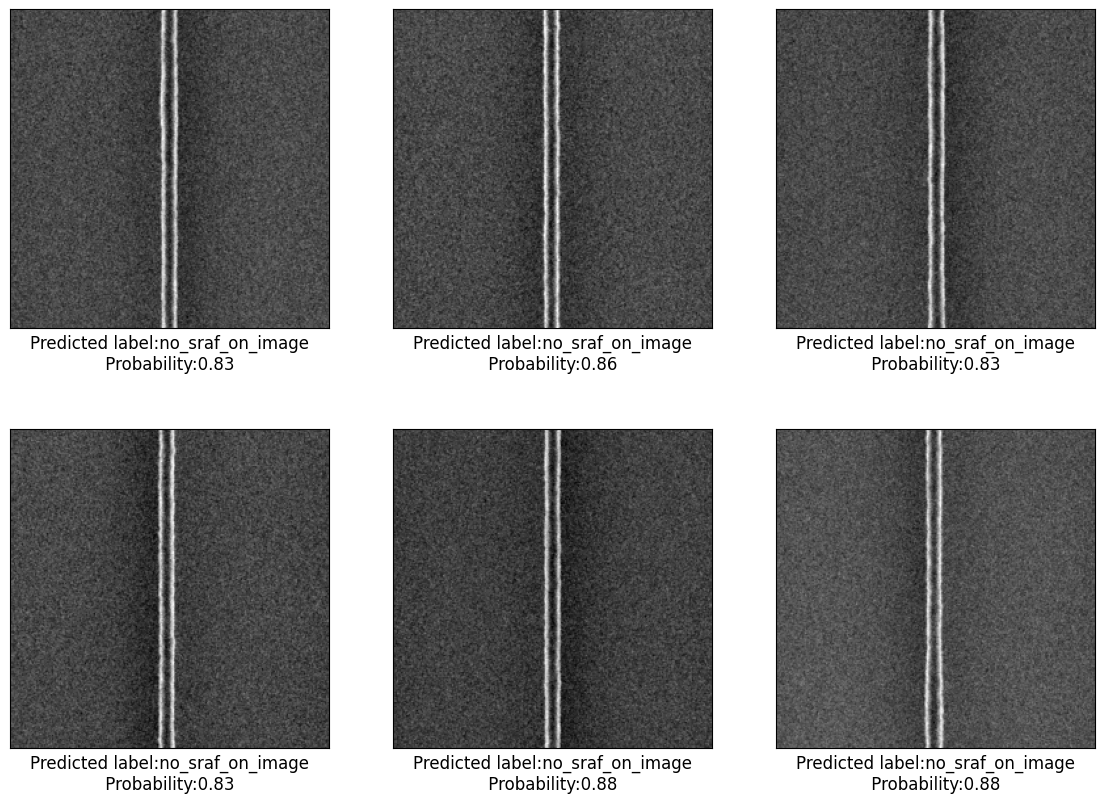

In [ ]:
pred_visual(new_model, test_loader)

In [ ]:
import numpy as np


In [ ]:
a = np.array(([1,2,3],
            [3,4,5],
            [8,50,100]))


In [ ]:
a.shape

array([[1, 2, 3],
       [3, 4, 5]])

In [ ]:
a[:2]


array([[1, 2, 3],
       [3, 4, 5]])

In [ ]:
np.max(a, axis =1)


array([  3,   5, 100])